### Movielens Case Study

In [1]:
# Import the required libraries

import pandas as pd
import  numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


## Import the three datasets

In [2]:
# Understand the dataset:
rat=['UserID','MovieID','Rating','Timestamp']
rating=pd.read_csv(r"data\ratings.dat",delimiter='::', header=None,names=rat)
rating

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
use=['UserID','Gender','Age','Occupation','Zip-code']
user=pd.read_csv(r"data\users.dat",delimiter="::",names=use)
user

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
mov=['MovieID','Title','Genres']
movies=pd.read_csv(r"data\movies.dat",delimiter='::',names=mov,
                  dtype={ 'MovieID': np.int32, 'Title': np.str, 'Genres': np. str},encoding="latin-1")
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
mov=['MovieID','Title','Genres']
mo=pd.read_csv(r"C:\Users\Gaumi\Downloads\Data-Science-with-Python-Project-One-master\Data-Science-with-Python-Project-One-master\Data science with Python 1\Data science with Python 1\movies.dat",delimiter='::',names=mov,
                  encoding="latin-1")
mo

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
print(rating.shape)
print(user.shape)
print(movies.shape)

(1000209, 4)
(6040, 5)
(3883, 3)


In [7]:
# Create a new dataset [Master_Data] with the following columns
#MovieID ,Title,UserID ,Age, Gender ,Occupation, Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
master=pd.merge(rating,user,how='outer',on='UserID')
master_data=pd.merge(movies,master,how='outer',on='MovieID')
master_data=master_data.drop(columns=['Zip-code'],axis=1)
master_data

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,9.788243e+08,F,1.0,10.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,9.782370e+08,F,50.0,9.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,9.782335e+08,M,25.0,12.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,9.782260e+08,M,25.0,17.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,9.782265e+08,F,35.0,1.0
...,...,...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",Drama|Thriller,5812.0,4.0,9.920721e+08,F,25.0,7.0
1000382,3952,"Contender, The (2000)",Drama|Thriller,5831.0,3.0,9.862231e+08,M,25.0,1.0
1000383,3952,"Contender, The (2000)",Drama|Thriller,5837.0,4.0,1.011903e+09,M,25.0,7.0
1000384,3952,"Contender, The (2000)",Drama|Thriller,5927.0,1.0,9.798525e+08,M,35.0,14.0


In [8]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     1000386 non-null  int32  
 1   Title       1000386 non-null  object 
 2   Genres      1000386 non-null  object 
 3   UserID      1000209 non-null  float64
 4   Rating      1000209 non-null  float64
 5   Timestamp   1000209 non-null  float64
 6   Gender      1000209 non-null  object 
 7   Age         1000209 non-null  float64
 8   Occupation  1000209 non-null  float64
dtypes: float64(5), int32(1), object(3)
memory usage: 72.5+ MB


In [9]:
master_data.isnull().sum()

MovieID         0
Title           0
Genres          0
UserID        177
Rating        177
Timestamp     177
Gender        177
Age           177
Occupation    177
dtype: int64

In [10]:
master_data.dropna(inplace=True)

<AxesSubplot:>

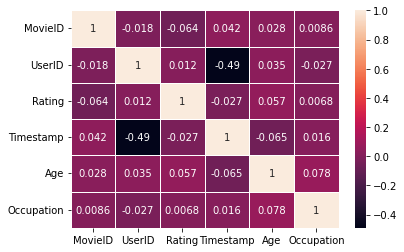

In [11]:
import seaborn as sns
master_data_co=master_data.corr()
master_data_co
sns.heatmap(master_data_co,annot= True,linewidths=0.5)

Text(0.5, 1.0, 'Age')

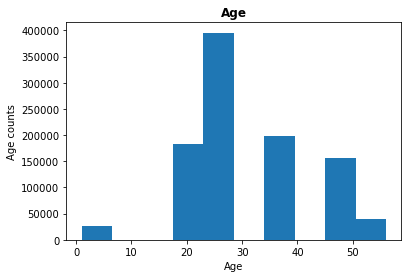

In [12]:
# Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
# User Age Distribution
plt.hist(master_data.Age)
plt.xlabel('Age')
plt.ylabel('Age counts')
  
plt.title('Age',
          fontweight ="bold")


In [13]:
#User rating of the movie “Toy Story”
mob=master_data.Title.unique()
mn = []
for i in mob:
    if i.startswith('Toy'):
     mn.append(i)
    
mn

['Toy Story (1995)', 'Toys (1992)', 'Toy Story 2 (1999)']

In [14]:
#User rating of the movie “Toy Story”
m=master_data.groupby(by=master_data.Title)
m=m.get_group('Toy Story (1995)')
m


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1.0,10.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,978237008.0,F,50.0,9.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,978233496.0,M,25.0,12.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,978225952.0,M,25.0,17.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,978226474.0,F,35.0,1.0
...,...,...,...,...,...,...,...,...,...
2072,1,Toy Story (1995),Animation|Children's|Comedy,6022.0,5.0,956755763.0,M,25.0,17.0
2073,1,Toy Story (1995),Animation|Children's|Comedy,6025.0,5.0,956812867.0,F,25.0,1.0
2074,1,Toy Story (1995),Animation|Children's|Comedy,6032.0,4.0,956718127.0,M,45.0,7.0
2075,1,Toy Story (1995),Animation|Children's|Comedy,6035.0,4.0,956712849.0,F,25.0,1.0


<AxesSubplot:>

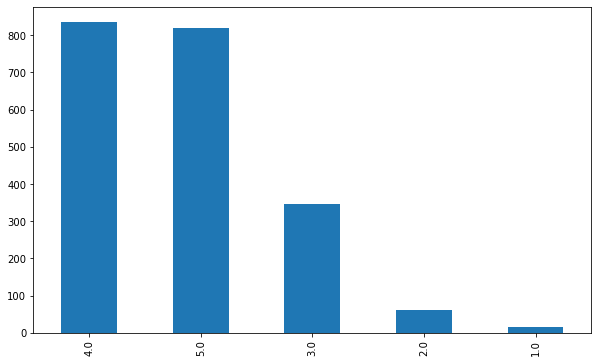

In [15]:
Toy_Story=master_data[master_data['Title']=='Toy Story (1995)']
Toy_Story['Rating'].value_counts().plot(kind='bar',figsize=(10,6))

In [16]:
#Top 25 movies by viewership rating
Top_25=master_data.groupby(['MovieID','Title']).Timestamp.count().sort_values(ascending=False).head(25)
o=Top_25.sort_values(ascending=False)
o


MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                                             2513
2762     Sixth

<AxesSubplot:xlabel='MovieID,Title'>

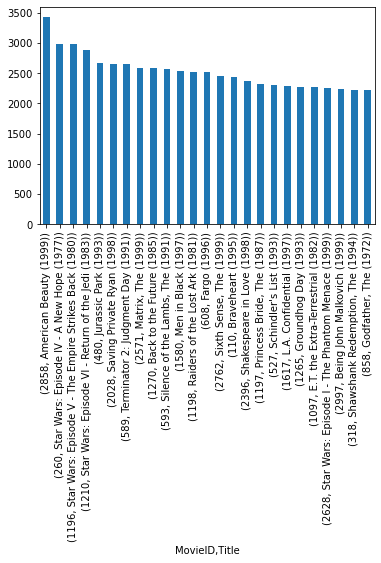

In [17]:
o.plot(kind='bar')

In [18]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
user_id_2696=master_data[master_data['UserID']==2696]
user_id_2696


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
95267,350,"Client, The (1994)",Drama|Mystery|Thriller,2696.0,3.0,973308886.0,M,25.0,7.0
200572,800,Lone Star (1996),Drama|Mystery,2696.0,5.0,973308842.0,M,25.0,7.0
270398,1092,Basic Instinct (1992),Mystery|Thriller,2696.0,4.0,973308886.0,M,25.0,7.0
274632,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696.0,3.0,973308690.0,M,25.0,7.0
349405,1258,"Shining, The (1980)",Horror,2696.0,4.0,973308710.0,M,25.0,7.0
360454,1270,Back to the Future (1985),Comedy|Sci-Fi,2696.0,2.0,973308676.0,M,25.0,7.0
448383,1589,Cop Land (1997),Crime|Drama|Mystery,2696.0,3.0,973308865.0,M,25.0,7.0
457283,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696.0,4.0,973308842.0,M,25.0,7.0
459925,1625,"Game, The (1997)",Mystery|Thriller,2696.0,4.0,973308842.0,M,25.0,7.0
464564,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696.0,2.0,973308920.0,M,25.0,7.0


In [19]:
user_id_2696.shape

(20, 9)

<AxesSubplot:>

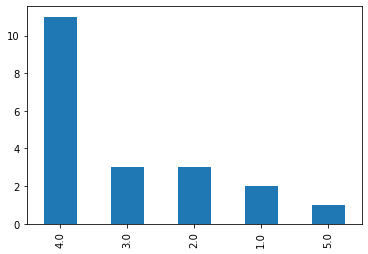

In [20]:
user_id_2696['Rating'].value_counts().plot(kind='bar')

## Feature Engineering:
    # Use column genres:

In [21]:
#Find out all the unique genres (Hint: split the data in column genre making a list and 
#then process the data to find out only the unique categories of genres)
Genre = master_data['Genres'].unique()
Genre

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [22]:
Genre=master_data['Genres'].str.split('|').str[0]
Genre.unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

In [23]:
# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
#whether or not the movie belongs to that genre. 
master_data



,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,9.788243e+08,F,1.0,10.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,9.782370e+08,F,50.0,9.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,9.782335e+08,M,25.0,12.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,9.782260e+08,M,25.0,17.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,9.782265e+08,F,35.0,1.0
...,...,...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",Drama|Thriller,5812.0,4.0,9.920721e+08,F,25.0,7.0
1000382,3952,"Contender, The (2000)",Drama|Thriller,5831.0,3.0,9.862231e+08,M,25.0,1.0
1000383,3952,"Contender, The (2000)",Drama|Thriller,5837.0,4.0,1.011903e+09,M,25.0,7.0
1000384,3952,"Contender, The (2000)",Drama|Thriller,5927.0,1.0,9.798525e+08,M,35.0,14.0


In [24]:
new_data = pd.concat([master_data,master_data.Genres.str.get_dummies()], axis=1)
new_data


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,9.788243e+08,F,1.0,10.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,9.782370e+08,F,50.0,9.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,9.782335e+08,M,25.0,12.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,9.782260e+08,M,25.0,17.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,9.782265e+08,F,35.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",Drama|Thriller,5812.0,4.0,9.920721e+08,F,25.0,7.0,0,...,0,0,0,0,0,0,0,1,0,0
1000382,3952,"Contender, The (2000)",Drama|Thriller,5831.0,3.0,9.862231e+08,M,25.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1000383,3952,"Contender, The (2000)",Drama|Thriller,5837.0,4.0,1.011903e+09,M,25.0,7.0,0,...,0,0,0,0,0,0,0,1,0,0
1000384,3952,"Contender, The (2000)",Drama|Thriller,5927.0,1.0,9.798525e+08,M,35.0,14.0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df_new = new_data.drop(['Title','MovieID','UserID','Timestamp','Genres'],axis=1)
df_new

,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5.0,F,1.0,10.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,F,50.0,9.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,M,25.0,12.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,M,25.0,17.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,F,35.0,1.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,4.0,F,25.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000382,3.0,M,25.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000383,4.0,M,25.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000384,1.0,M,35.0,14.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
genres=pd.get_dummies(df_new,columns=['Gender'])
genres

,Rating,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender_F,Gender_M
0,5.0,1.0,10.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.0,50.0,9.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.0,25.0,12.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5.0,25.0,17.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.0,35.0,1.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,4.0,25.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1000382,3.0,25.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000383,4.0,25.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000384,1.0,35.0,14.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [27]:
#Determine the features affecting the ratings of any particular movie.
genres.columns

Index(['Rating', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Gender_F', 'Gender_M'],
      dtype='object')

In [28]:
genres.dtypes

Rating         float64
Age            float64
Occupation     float64
Action           int64
Adventure        int64
Animation        int64
Children's       int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
Gender_F         uint8
Gender_M         uint8
dtype: object

In [29]:
genres.Occupation.value_counts()

4.0     131032
0.0     130499
7.0     105425
1.0      85351
17.0     72816
20.0     60397
12.0     57214
2.0      50068
14.0     49109
16.0     46021
6.0      37205
3.0      31623
10.0     23290
15.0     22951
5.0      21850
11.0     20563
19.0     14904
13.0     13754
18.0     12086
9.0      11345
8.0       2706
Name: Occupation, dtype: int64

In [30]:
data=pd.get_dummies(genres,columns=['Occupation'])
data


,Rating,Age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Occupation_11.0,Occupation_12.0,Occupation_13.0,Occupation_14.0,Occupation_15.0,Occupation_16.0,Occupation_17.0,Occupation_18.0,Occupation_19.0,Occupation_20.0
0,5.0,1.0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,50.0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,25.0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5.0,25.0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5.0,35.0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,4.0,25.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000382,3.0,25.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000383,4.0,25.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000384,1.0,35.0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [31]:
#Develop an appropriate model to predict the movie ratings
X=data.drop('Rating',axis=1)
y=data['Rating'].astype('int64')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

y.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
print('Root Mean Sq Error RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score:',(r2_score(y_test, y_pred)))




Root Mean Sq Error RMSE: 1.0966315720743967
r2_score: 0.03856822509228286


In [33]:
p=pd.DataFrame({'TEST': y_test,'PRE':y_pred})
p.head()

,TEST,PRE
895699,2,3.618176
899902,3,3.648281
55691,3,3.827728
63731,4,3.467014
822157,4,3.713577


In [34]:
import xgboost
xgb = xgboost.XGBClassifier(n_jobs=2)
xgb.fit(X_train, y_train)
y_pred_xgb =xgb.predict(X_test)

print('XGB accuracy score is : ', accuracy_score(y_test-1,y_pred_xgb)*100)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [ ]:
s=pd.DataFrame({'TEST': y_test,'PRE':y_pred})
s.head()


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy
cm